In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import dataimport
from ramandecompy import machine_learning
from scipy import interpolate

In [2]:
dataprep.new_hdf5('supervised_calibration_dataset')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/water.xlsx', 'water')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx', 'hydrogen')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx', 'methane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx', 'carbon monoxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CO2_100wt%.csv', 'carbon dioxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/sapphire.xlsx', 'sapphire')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Propane_test.xlsx', 'propane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethane_test.xlsx', 'ethane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx', 'acetaldehyde')

Data from ../ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/sapphire.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_fil

In [3]:
dataprep.view_hdf5('supervised_calibration_dataset.hdf5')

**** supervised_calibration_dataset.hdf5 ****
Acetaldehyde
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    counts
|    residuals
|    wavenumber
Ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Propane
|    Peak_01
|    counts
|    residuals
|    wavenumber
carbon dioxide
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
carbon monoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
methane
|    Peak_01
|    counts
|    residuals
|    wavenumber
sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
water
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber


# Interpolated calibration dataset

In [4]:
dataprep.new_hdf5('supervised_calibration_interp')

In [5]:
dataprep.view_hdf5('supervised_calibration_interp.hdf5')

**** supervised_calibration_interp.hdf5 ****


In [6]:
hdf5_interpfilename = 'supervised_calibration_interp.hdf5'
# first a function that will return a normalized interpolated spectra
target_compound = 'water'
# compound = 'water'
hdf5_calfilename = 'supervised_calibration_dataset.hdf5'
spectra_count = 1
def interpolated_spectra(hdf5_interpfilename, hdf5_calfilename, spectra_count):
    hdf5 = h5py.File(hdf5_calfilename, 'r+')
    # get list of compounds from hdf5 file
    y_data_list = []
    x_data_list = []
    
    compound_list = list(hdf5.keys())
    print(compound_list)
    for _, target_compound in enumerate(compound_list):
        x_data, y_data, labels = machine_learning.generate_spectra_dataset(hdf5_calfilename, target_compound, spectra_count)
        y_data_list.append(y_data)
        x_data_list.append(x_data)
        for i, label in enumerate(labels):
            interpdf = machine_learning.combine_experiment(hdf5_interpfilename, 'interp_'+target_compound, x_data, y_data, label, i) 
            
    return interpdf

['Acetaldehyde', 'Ethane', 'Propane', 'carbon dioxide', 'carbon monoxide', 'hydrogen', 'methane', 'sapphire', 'water']
interp_Acetaldehyde/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_Ethane/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_Propane/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_carbon dioxide/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_carbon monoxide/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_hydrogen/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_methane/0/residuals
Data f

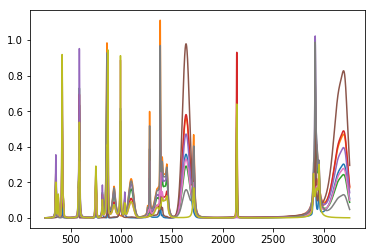

In [7]:
frames = []

interpdf = interpolated_spectra(hdf5_interpfilename, hdf5_calfilename, spectra_count)
frames.append(interpdf)

In [8]:
frames

[             0
 0     1.000000
 1    13.673807
 2  2952.000000
 3    10.502186
 4    27.347614
 5     0.244478
 6    10.334504]

In [9]:
key_list = machine_learning.keyfinder(hdf5_interpfilename)
print(key_list)

['interp_Acetaldehyde/0', 'interp_Ethane/0', 'interp_Propane/0', 'interp_carbon dioxide/0', 'interp_carbon monoxide/0', 'interp_hydrogen/0', 'interp_methane/0', 'interp_sapphire/0', 'interp_water/0']


In [10]:
df = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
      keys=None, levels=None, names=None, verify_integrity=False,
      copy=True,sort=True)
df

,0
0,1.000000
1,13.673807
2,2952.000000
3,10.502186
4,27.347614
5,0.244478
6,10.334504


# SAVE your hdf5 file before continuing 

In [11]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'supervised_calibration_interp.hdf5'
frames = []
for i,key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
The peaks that we found for Propane are: 
870.1669869869869
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1

The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for Propane are: 
870.1669869869869
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks 

The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Propane are: 
870.1669869869869
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for 

(0.9247516830509649, 3.5352546446933646, 1280.0, 3.425928787586024, 7.070509289386729, 0.3195072469489091, 3.4206590329396946, "['carbon dioxide']")
(0.06997586535593914, 3.2959485633957413, 1385.0, 3.3885456630779878, 6.5918971267914825, 0.4720224019126161, 3.3881932630296223, "['carbon dioxide']")
(0.6172403095176313, 46.31277410869246, 1405.0, 15.54498771708435, 92.62554821738492, 0.1262935477402262, 15.34603966458476, "['Acetaldehyde']")
(1.4252055091645843e-10, 8.456252945216047, 1450.0, 1.0270546523188826, 16.912505890432094, 0.057049702383358124, 1.027054652318336, "['Acetaldehyde']")
(1.2827636651224772e-06, 40.40566213078802, 1640.0, 28.14462216119577, 80.81132426157605, 0.32718305957925714, 28.14462153953725, "['water']")
(0.9548101241228899, 9.404458460724472, 1715.0, 4.821337564695209, 18.808916921448944, 0.16669409492758763, 4.802976369639954, "['Acetaldehyde']")
(0.00014734449007081096, 4.328995231114445, 2141.0, 0.24008121111361902, 8.65799046222889, 0.026048830679361153

(0.9322838341553773, 9.284896866203608, 1716.0, 4.760513255774264, 18.569793732407216, 0.16845928843598693, 4.743037043503051, "['Acetaldehyde']")
(0.18322709750141813, 4.297530302264661, 2141.0, 6.260106518823196, 8.595060604529323, 0.6438162106620835, 6.257867839729217, "['carbon monoxide']")
(1.0, 11.37978779100186, 2898.0, 7.401006357679085, 22.75957558200372, 0.20701734818122988, 7.3158095213303325, "['Ethane']")
(0.9999999976818121, 13.673806865772113, 2952.0, 10.502186484951666, 27.347613731544225, 0.24447835348326377, 10.334504076920437, "['Ethane']")
{'Acetaldehyde': 75.0, 'Ethane': 100.0, 'Propane': 100.0, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'methane': 0.0, 'sapphire': 75.0, 'water': 0.0}


In [12]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [13]:
cal = pd.DataFrame()

In [14]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
cal['fraction']= result[:][0]
cal['sigma']= result[:][1]
# dat['center']= result[:][2]
cal['amplitude']= result[:][3]
cal['fwhm']= result[:][4]
cal['height']= result[:][5]
cal['auc']= result[:][6]
cal['labelencoded']=le.fit_transform(result[:][7])
cal['labels']= result[:][7]
cal['center']= result[:][2]

In [15]:
cal

,fraction,sigma,amplitude,fwhm,height,auc,labelencoded,labels,center
0,0.762912,4.36224,2.94339,8.72447,0.238999,2.91235,6,['hydrogen'],355
0,0.768468,3.63543,0.829044,7.27086,0.0805836,0.824344,8,['sapphire'],417
0,0.605752,4.48648,7.51604,8.97297,0.633253,7.49425,6,['hydrogen'],587
0,0.0450781,6.83848,0.367804,13.677,0.0248965,0.367717,8,['sapphire'],750
0,0.730441,3.92821,1.2687,7.85641,0.115986,1.26617,6,['hydrogen'],815
0,1.08604e-08,3.2639,2.99745,6.5278,0.431372,2.99745,3,['Propane'],869
0,0.719639,3.64107,6.26503,7.28214,0.620742,6.25568,2,['Ethane'],993
0,0.926364,4.19718,1.14462,8.39437,0.0898472,1.14217,6,['hydrogen'],1035
0,0.936274,3.55661,1.32953,7.11322,0.122597,1.32745,4,['carbon dioxide'],1280
0,0.851005,3.4582,2.12471,6.91641,0.209429,2.12189,4,['carbon dioxide'],1385


# Experimental dataset

In [16]:
dataprep.view_hdf5('dataimport_ML_df-Copy1.hdf5')

**** dataimport_ML_df-Copy1.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|   

|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    15s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    20s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    | 

In [17]:
key_list = machine_learning.keyfinder('dataimport_ML_df-Copy1.hdf5')
key_list

['300C/25s',
 '300C/35s',
 '300C/45s',
 '300C/55s',
 '300C/65s',
 '320C/25s',
 '320C/30s',
 '320C/40s',
 '320C/50s',
 '320C/60s',
 '340C/20s',
 '340C/30s',
 '340C/40s',
 '340C/50s',
 '340C/60s',
 '360C/20s',
 '360C/30s',
 '360C/40s',
 '360C/50s',
 '360C/60s',
 '380C/15s',
 '380C/25s',
 '380C/35s',
 '380C/45s',
 '380C/55s',
 '390C/10s',
 '390C/15s',
 '390C/20s',
 '390C/25s',
 '390C/30s',
 '400C/10s',
 '400C/125s',
 '400C/15s',
 '400C/5s',
 '400C/75s',
 '410C/10s',
 '410C/125s',
 '410C/15s',
 '410C/5s',
 '410C/75s',
 '420C/10s',
 '420C/5s',
 '420C/625s',
 '420C/75s',
 '420C/875s',
 '430C/4s',
 '430C/5s',
 '430C/6s',
 '430C/7s',
 '430C/8s']

In [18]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' 
hdf5_expfilename = 'dataimport_ML_df-Copy1.hdf5'
frames = []
for _, key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for Propane are: 
870.1669869869869
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

(1.2212453270876722e-14, 21.312586031837316, 2940.6, 3750.9347915738026, 42.62517206367463, 82.66870965147127, 3750.9364202866177, "['Unassigned']")
(0.6870923336298637, 86.50685483074956, 3192.5, 63408.575031046435, 173.01370966149912, 268.04444393983397, 46190.465559872435, "['water']")
{'Acetaldehyde': 25.0, 'Ethane': 0.0, 'Propane': 0.0, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 25.0, 'methane': 0.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for Propane are: 
870.1669869869869
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are

The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Propane are: 
870.1669869869869
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

(0.0002064113456278216, 22.143813537036717, 2943.9, 3517.4741268820767, 44.287627074073434, 74.60834278876376, 3517.4569209823812, "['Ethane']")
(0.5087708665485023, 78.95713147349036, 3181.3, 52010.632014203475, 157.91426294698073, 258.67025635869766, 41573.32178265493, "['Unassigned']")
{'Acetaldehyde': 25.0, 'Ethane': 33.33333333333333, 'Propane': 0.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'methane': 0.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for Propane are: 
870.1669869869869
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

(0.09885886134522603, 45.98863635487617, 1647.6, 32248.42581232427, 91.97727270975234, 318.8828870026149, 32186.030646996645, "['water']")
(0.12569041350240473, 27.399468131907568, 1713.2, 22000.119609406298, 54.798936263815136, 361.8752776891271, 21968.01461046933, "['Acetaldehyde']")
(0.752633868902864, 4.490698451000747, 2137.9, 1352.578697778046, 8.981396902001494, 107.15434229048186, 1350.705570395286, "['carbon monoxide']")
(0.0, 3.197504779843279, 2328.9, 174.35068744167125, 6.395009559686558, 25.612398827695436, 174.36798865572285, "['Unassigned']")
(2.7755575615628914e-16, 21.890958800502986, 2948.2, 2852.1704088599004, 43.78191760100597, 61.199585447702084, 2852.1707987379677, "['Ethane']")
(0.6046800282139293, 87.77420746744392, 3187.9, 61552.42818362468, 175.54841493488783, 265.19135589835696, 46048.173530521184, "['water']")
{'Acetaldehyde': 25.0, 'Ethane': 33.33333333333333, 'Propane': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'methane': 0

(0.29907104209268265, 44.130612482533515, 1647.6, 34996.77270390216, 88.26122496506703, 336.5897884293259, 34800.20350250818, "['water']")
(0.009707267064797354, 27.247974805995245, 1713.2, 22497.67683837372, 54.49594961199049, 386.61632380001, 22495.16284419571, "['Acetaldehyde']")
(0.677518523495032, 3.9721700781037836, 2137.9, 1108.3717354302826, 7.944340156207567, 102.443653154406, 1107.267290719204, "['carbon monoxide']")
(5.9161276544372754e-08, 4.117128694003725, 2330.3, 232.28538541910567, 8.23425738800745, 26.50118109208391, 232.2670815969268, "['Unassigned']")
(5.473954622914334e-13, 21.904372585792824, 2940.6, 3323.9869297716405, 43.80874517158565, 71.27976899376466, 3323.9883388683843, "['Unassigned']")
(0.3157525441767858, 93.93554798151705, 3193.5, 53719.445510220525, 187.8710959630341, 241.2805615774187, 40305.55368923154, "['water']")
{'Acetaldehyde': 25.0, 'Ethane': 0.0, 'Propane': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'methane': 0.0

(0.1787822764624285, 27.33253340849669, 1713.2, 19482.899625464186, 54.66506681699338, 315.5248888455756, 19442.55432534645, "['Acetaldehyde']")
(0.6516087893708196, 4.782504503213735, 2139.4, 1453.5792830876765, 9.56500900642747, 112.77860907313467, 1451.6760502666996, "['carbon monoxide']")
(0.9104912985583051, 3.916700861237534, 2330.3, 335.8697006989489, 7.833401722475068, 28.458258871244436, 335.3080607940763, "['Unassigned']")
(7.216449660063518e-16, 20.606060460853264, 2941.7, 2378.9014659672503, 41.21212092170653, 54.22746195781918, 2378.902410373965, "['Unassigned']")
(0.44070112358407443, 94.78900539863581, 3193.5, 58325.034345688146, 189.57801079727162, 247.9671454156878, 42878.179683219816, "['water']")
{'Acetaldehyde': 12.5, 'Ethane': 0.0, 'Propane': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'methane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209

(0.23318997215732468, 25.467077943538154, 1714.9, 19869.520127723357, 50.93415588707631, 338.9297654247959, 19819.517466521644, "['Acetaldehyde']")
(0.8033120951873867, 4.074866179459823, 2137.9, 1041.757130095521, 8.149732358919646, 88.99075125384681, 1040.421283436898, "['carbon monoxide']")
(1.5709988865353353e-11, 3.5700744683308323, 2330.3, 205.29635721161327, 7.140148936661665, 27.011068376260628, 205.2857910476649, "['Unassigned']")
(2.7755575615628914e-16, 21.19306393992618, 2943.9, 2964.0035793709853, 42.38612787985236, 65.69355579148986, 2964.0044752507274, "['Ethane']")
(0.49306042799988287, 94.37213803471825, 3194.4, 59121.65448926551, 188.7442760694365, 247.49778294810596, 43024.723505859365, "['water']")
{'Acetaldehyde': 25.0, 'Ethane': 33.33333333333333, 'Propane': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 25.0, 'methane': 0.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
10

(0.3852844388012089, 28.141020804838142, 1711.5, 16856.470467348914, 56.282041609676284, 246.41852396926816, 16779.007881885245, "['Acetaldehyde']")
(0.5340837104414609, 4.813600598173878, 2139.4, 1234.3961931767735, 9.627201196347755, 99.7173541241549, 1233.073473997388, "['carbon monoxide']")
(5.325113683340987e-10, 4.059760096999858, 2330.3, 232.08257188269806, 8.119520193999715, 26.852204873730685, 232.06420644539276, "['Unassigned']")
(8.885845331596531e-06, 20.665946312170373, 2948.2, 1966.7477230575494, 41.331892624340746, 44.70230418738823, 1966.7475452120768, "['Ethane']")
(0.5945941392507818, 87.3633074498916, 3187.9, 57487.79429130027, 174.7266148997832, 249.84915805709443, 43129.06074135374, "['water']")
{'Acetaldehyde': 12.5, 'Ethane': 33.33333333333333, 'Propane': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'methane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
109

(0.49300096223899686, 29.506459615757127, 1709.8, 11765.543208782175, 59.01291923151425, 157.53363919104197, 11692.997252370455, "['Acetaldehyde']")
(0.2281917244346935, 5.052092678458505, 2140.9, 1107.6494474744763, 10.10418535691701, 95.40879096394, 1107.048295029679, "['carbon monoxide']")
(1.787459069646502e-13, 3.778268453891745, 2330.3, 205.20929348783332, 7.55653690778349, 25.511853192896584, 205.19453852354985, "['Unassigned']")
(2.3869795029440866e-15, 19.094161306455007, 2948.2, 1173.4581246887776, 38.188322612910014, 28.86720944776308, 1173.458229381748, "['Ethane']")
(0.5179123648486419, 90.4133266742075, 3189.7, 54337.70667795137, 180.826653348415, 235.1695655060763, 40609.688732475006, "['water']")
{'Acetaldehyde': 12.5, 'Ethane': 33.33333333333333, 'Propane': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'methane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.84

(0.29917336604658007, 26.7493237713691, 1713.2, 17141.420552584168, 53.4986475427382, 271.97628920545515, 17083.284145270318, "['Acetaldehyde']")
(0.5838387604176369, 4.90102231617961, 2139.4, 876.1449187827068, 9.80204463235922, 68.1677938354004, 875.0860837278693, "['carbon monoxide']")
(9.492406860545088e-15, 3.946950312054372, 2330.3, 223.79296819997543, 7.893900624108744, 26.63315223348645, 223.77545026053056, "['Unassigned']")
(6.979389288730431e-11, 20.42305742677139, 2948.2, 2017.6472213143618, 40.84611485354278, 46.40473204663755, 2017.6474568583367, "['Ethane']")
(0.6751718229111352, 86.76742176228458, 3187.9, 58881.55952129356, 173.53484352456917, 249.38490597672026, 43683.39875973003, "['water']")
{'Acetaldehyde': 12.5, 'Ethane': 33.33333333333333, 'Propane': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'methane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.84102

The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Propane are: 
870.1669869869869
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapph

(4.2330690902536716e-07, 41.035139700395156, 1642.4, 27578.710561795044, 82.07027940079031, 315.6863294996734, 27578.706898066648, "['water']")
(0.004138873766559192, 29.29910504770007, 1713.2, 13188.405894533707, 58.59821009540014, 211.1523677199614, 13187.73219206828, "['Acetaldehyde']")
(0.48867029581916716, 5.072335520752193, 2139.4, 567.1138463530791, 10.144671041504386, 44.24466393064393, 566.5155889252907, "['carbon monoxide']")
(2.355124151254273e-09, 3.444141588667955, 2328.9, 197.62652190374425, 6.88828317733591, 26.952684292371536, 197.63166136147186, "['Unassigned']")
(0.0, 17.76961056759627, 2943.9, 1061.37059299185, 35.53922113519254, 28.056076349538625, 1061.370850901045, "['Ethane']")
(0.8754080655919028, 77.76346677090167, 3193.5, 46669.4980525172, 155.52693354180334, 202.35402457731647, 33727.2483654744, "['water']")
{'Acetaldehyde': 12.5, 'Ethane': 33.33333333333333, 'Propane': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'methane': 0.0,

The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Propane are: 
870.1669869869869
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.

The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for Propane are: 
870.1669869869869
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks 

(0.2279050580968227, 25.99469400422632, 1714.9, 16580.579036557556, 51.98938800845264, 277.5975726359828, 16538.95393715238, "['Acetaldehyde']")
(0.5287702762342471, 5.18626449214018, 2139.4, 645.2925799217289, 10.37252898428036, 48.48259085370827, 644.5311571852973, "['carbon monoxide']")
(4.163336342344337e-14, 4.025070390015872, 2328.9, 268.70593501609994, 8.050140780031745, 31.35751029200901, 268.69458835760594, "['Unassigned']")
(0.0001950822338255831, 20.767582424776194, 2947.2, 2005.4969214851135, 41.53516484955239, 45.357231729460146, 2005.487931764936, "['Ethane']")
(0.7011701198482362, 82.60184629997632, 3183.2, 64817.30770556965, 165.20369259995263, 285.28029055993466, 49269.42064618251, "['Unassigned']")
{'Acetaldehyde': 12.5, 'Ethane': 33.33333333333333, 'Propane': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'methane': 0.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098

(0.9999999543465596, 4.913690170333027, 2140.9, 448.99871584526517, 9.827380340666053, 29.08623219752489, 448.0038314398146, "['carbon monoxide']")
(0.9424360893101427, 3.8547794194325675, 2328.9, 320.8234831912801, 7.709558838865135, 27.217505803082993, 320.2858545625455, "['Unassigned']")
(0.18856679815960703, 99.994323040283, 3198.1, 17336.831217847794, 199.988646080566, 76.48888955208858, 12740.636028658588, "['water']")
{'Acetaldehyde': 0.0, 'Ethane': 0.0, 'Propane': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'methane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


(0.5134459228045656, 4.265652700771108, 2140.9, 611.5301330058445, 8.531305401542216, 56.1945942840307, 610.9304329391209, "['carbon monoxide']")
(3.497202527569243e-14, 3.8071106009161024, 2328.9, 238.61907882760684, 7.614221201832205, 29.440654811247235, 238.61247948991397, "['Unassigned']")
(0.5057583577693424, 92.72570912787533, 3188.8, 34891.331022328886, 185.45141825575067, 147.93374611571323, 26040.562297017, "['water']")
{'Acetaldehyde': 0.0, 'Ethane': 0.0, 'Propane': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'methane': 0.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that 

The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Propane are: 
870.1669869869869
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.

The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Propane are: 
870.1669869869869
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.

In [19]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [20]:
dat = pd.DataFrame()

In [21]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
# dat['center']= result[:][2]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labelencoded']=le.fit_transform(result[:][7])
dat['labels']= result[:][7]
dat['center']= result[:][2]

In [22]:
dat

,fraction,sigma,amplitude,fwhm,height,auc,labelencoded,labels,center
0,2.66632e-06,9.47784,251.853,18.9557,12.4817,251.852,3,['Unassigned'],314.77
0,0.506813,4.0129,1034.01,8.0258,101.26,1028.59,8,['sapphire'],378.71
0,0.636782,3.84759,7306.16,7.69519,708.864,7270.35,8,['sapphire'],418.14
0,2.55231e-05,2.69962,193.734,5.39924,33.7084,193.741,3,['Unassigned'],448.67
0,0.188666,4.21062,1090.47,8.42124,114.25,1089.49,6,"['hydrogen', 'sapphire']",578.11
0,1.38778e-15,20.4979,6837.15,40.9957,156.677,6837.15,3,['Unassigned'],711.51
0,6.88713e-07,7.19462,3533.44,14.3892,230.689,3533.44,8,['sapphire'],751.21
0,0,18.0052,1438.24,36.0103,37.5207,1438.24,3,['Unassigned'],1055.9
0,0.841161,29.1589,20781.3,58.3177,243.997,20534.1,3,['Unassigned'],1217.6
0,1,15.8466,15275.1,31.6932,306.831,15166.6,1,['Acetaldehyde'],1400.1


In [23]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','labelencoded']
X_train=cal[inputs]
y_train = cal['center']
X_test=dat[inputs]
y_test= dat['center']

# Logistic Regression

In [24]:
x_data_list[0]

NameError: name 'x_data_list' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

# divide and extract test/train and validation data

X_train, X_test, y_train, y_test = train_test_split(y_data_list[0], labels, test_size=0.2)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, y_train)

# get predictions
Z = logreg.predict(X_test)

logreg.score(X_test, y_test)

In [ ]:



fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x_data, y_data, label='data')
# ax.scatter(X_train, y_train, label='train')
# ax.scatter(X_test, y_test, label='teste')
# ax.scatter(X_test, regr.predict(X_test), label='predicted')

# fig, ax = plt.subplots(figsize=(5, 3))
# y = dat['fraction'].values
# x = dat['height'].values
# # Create the linear regression model
# LogRegr = linear_model.LogisticRegression() 
# # plotting the balance
# ax.scatter(dat['height'], dat['fraction'], label = 'balance default',color='r')

# # fit the linear model 
# LogRegr.fit(x.reshape(-1,1),y.reshape(-1,1))
# xres = np.array(x).reshape(-1,1)
# plt.plot(x,LogRegr.predict_proba(xres)[:,1],'o',label = 'fit')
# # Find the coefficients B0 and B1
# print('B0, B1: ',LogRegr.intercept_, LogRegr.coef_[0])
# ax.set_ylabel('Probability Default')
# ax.set_xlabel('Balance')
# ax.set_title('Probability Default vs. Balance')
plt.legend()

# Multiple Linear regression

In [ ]:
numdescriptors = 8
# train linear model of descriptors
yrange =  np.arange(1,numdescriptors,1)
for Y in yrange:
    MLR=linear_model.LinearRegression()
    MLR.fit(train[train.columns.values[0:Y]],train[train.columns.values[Y]])
    # WE are going to train using the first 8 values

    # make predictions on test and train set 
    trainpred=MLR.predict(train[train.columns.values[0:Y]])
    # predict the outputs using the training dataset
    testpred=MLR.predict(test[train.columns.values[0:Y]])
    # predict using test dataset
    #make parity plot 
    maxlimit  = train[train.columns.values[Y]].max()

    plt.figure(figsize=(7,7))
    plt.xlim([0,maxlimit]);
    plt.ylim([0,maxlimit]);
    print('This is for Y ='+str(Y))
    plt.scatter(train[train.columns.values[Y]],trainpred, label='Training')
    plt.scatter(test[train.columns.values[Y]],testpred,color='r', label='Test')
    plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

    #calculate the test and train error
    
    print("Train error",mean_squared_error(train[train.columns.values[Y]],trainpred)) # MSE of training dataset
    print("Test error",mean_squared_error(test[train.columns.values[Y]],testpred))
    # usually the training error is less than the test error